# Stochastic Simulation - Exercises

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import secrets
import math

## Lecture 1 Exercise 1 - The Monty Hall Problem

In [2]:
def monty_hall(switch_door, n_simulations):
    
    wins = 0

    for n in range(n_simulations):
        first_trial = np.random.randint(0, 3)
        doors_left = np.delete(doors, first_trial)
        if switch_door:
            second_trial = np.random.randint(0, 2)
            door_final = doors_left[second_trial]
        else:
            second_trial = first_trial
            door_final = doors[second_trial]
        if door_final == 'car':
            wins += 1
    
    return wins

doors = np.random.permutation(np.array(['goat', 'goat', 'car']))

n_sims = 100000

wins_switch_door = monty_hall(True, n_sims) / n_sims
wins_keep_door = monty_hall(False, n_sims) / n_sims

print(f"Average wins when switching door: {wins_switch_door}")
print(f"Average wins when keeping door: {wins_keep_door}")



Average wins when switching door: 0.33472
Average wins when keeping door: 0.33547


## Lecture 1 Exercise 2 - Galton Table

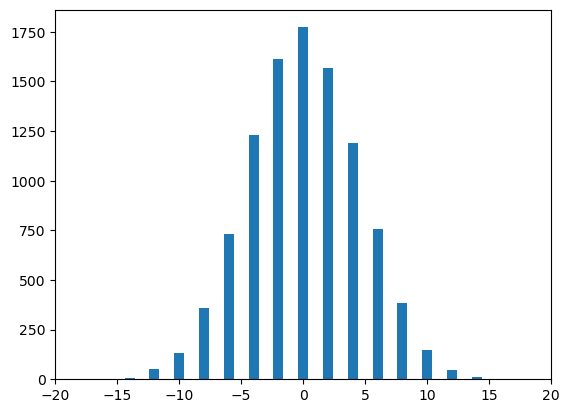

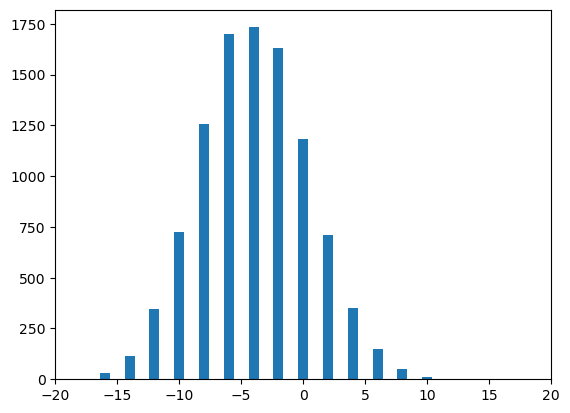

In [3]:
def galton_table(n_layers, n_trials, p=0.5):

    k_slots = dict()
    for i in range(n_trials):
        k = 0
        for n in range(n_layers):
            if np.random.uniform(0, 1) < p:
                k += 1
            else:
                k -= 1
        if k in k_slots.keys():
            k_slots[k] += 1
        else:
            k_slots[k] = 1
    
    return k_slots


n_trials = 10000
n_layers = 20

k_slots = galton_table(n_layers, n_trials)
plt.bar(k_slots.keys(), k_slots.values())
plt.xlim((-n_layers, n_layers))
plt.show()

k_slots_biased = galton_table(n_layers, n_trials, p=0.4)
plt.bar(k_slots_biased.keys(), k_slots_biased.values())
plt.xlim((-n_layers, n_layers))
plt.show()

## Lecture 1 Exercise 3 - Central Limit Theorem

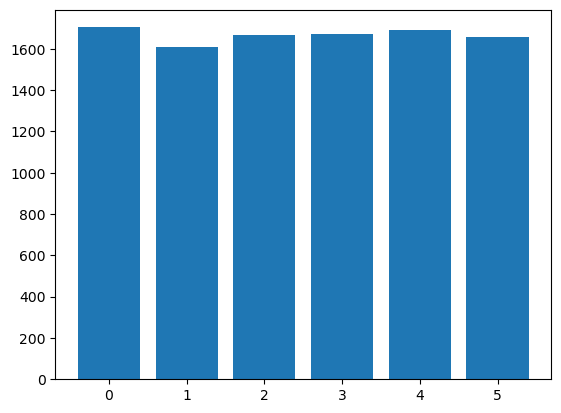

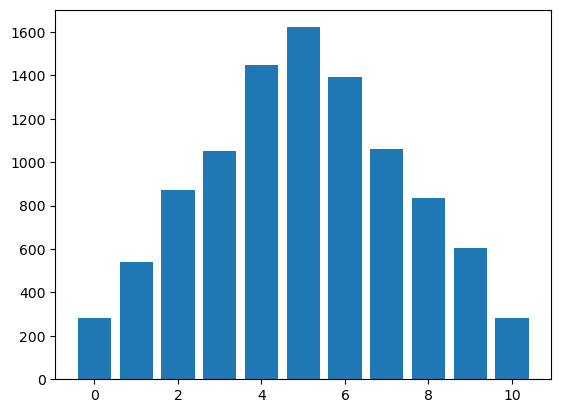

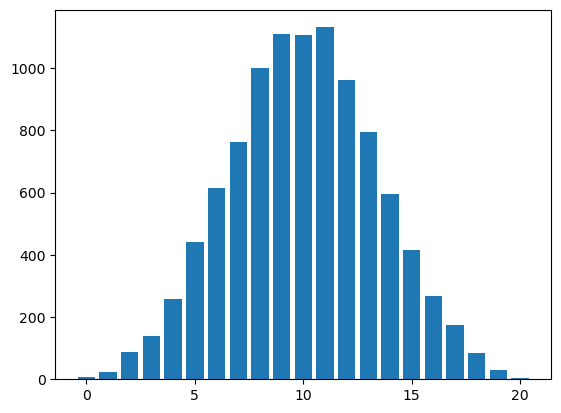

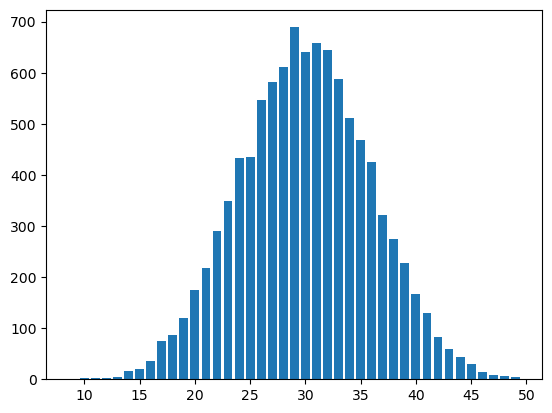

In [4]:
def dice_rolls(n_dice, n_rolls):

    dice_sums = dict()
    for n in range(n_rolls):
        dice_result = np.sum(np.random.randint(0, 6, n_dice))
        if dice_result in dice_sums.keys():
            dice_sums[dice_result] += 1
        else:
            dice_sums[dice_result] = 1

    return dice_sums

n_rolls = 10000
n_dice = 1
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 2
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 4
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 12
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

## Lecture 2 Exercise 1 - PRNG

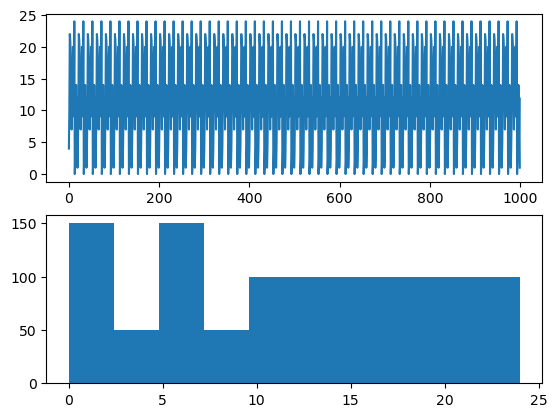

C:\Users\mihbo\AppData\Local\Temp\ipykernel_26884\1706282959.py:13: RuntimeWarning: overflow encountered in exp
  y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)
C:\Users\mihbo\AppData\Local\Temp\ipykernel_26884\1706282959.py:13: RuntimeWarning: invalid value encountered in remainder
  y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)


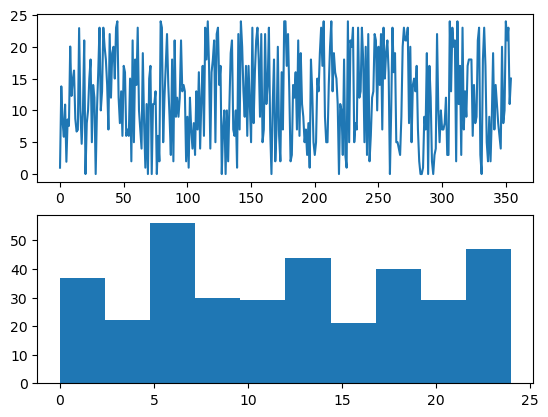

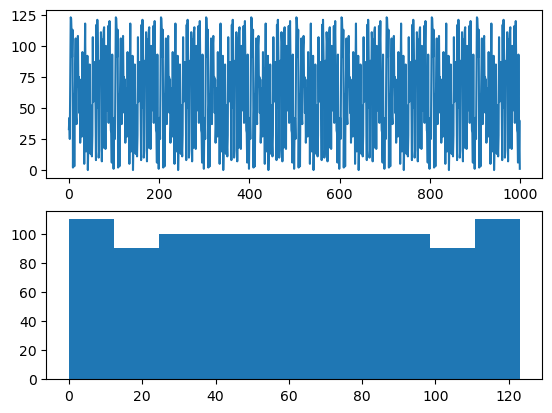

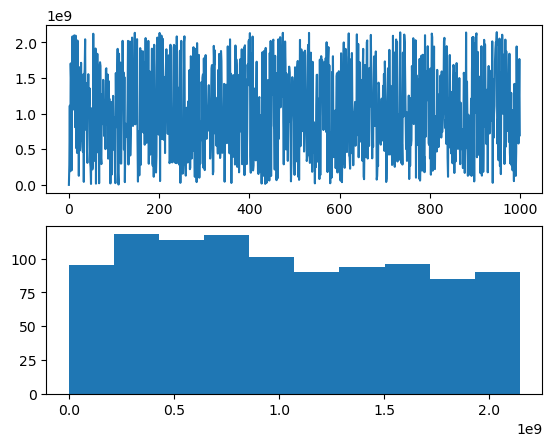

In [5]:
def prng(n, a, m, c, x0=1):
    x = x0
    x_seq = np.empty(n)
    x_seq[0] = x0
    for i in range(n):
        x = (a*x+c)%m
        x_seq[i] = x
    return x_seq

def prng_non_rec(n, a, m, c, x0=1):
    x_seq = np.arange(0, n+1, 1)
    b = np.log(a*x0+c)
    y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)
    return y_seq

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 2, 25, 2)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng_non_rec(1000, 2, 25, 2)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 12, 125, 21)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 7**5, 2**31-1, 21)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

## Lecture 2 Exercise 2 - CSPRNG

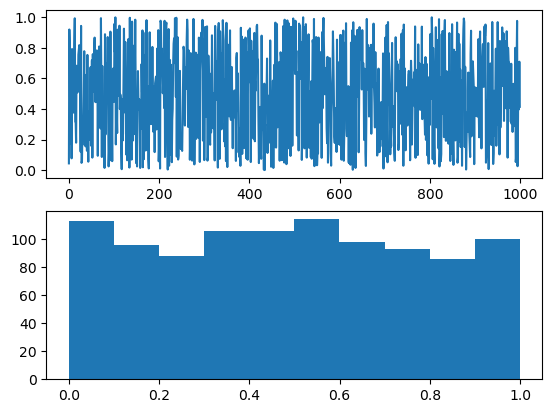

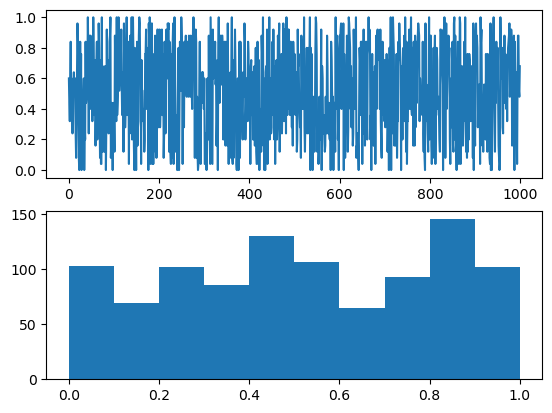

In [9]:
fig, axs = plt.subplots(2, 1)
seq = np.random.uniform(0, 1, 1000)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = [secrets.randbelow(26)/25 for _ in range(1000)]
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

## Lecture 2 Exercise 3 - Hit and Miss Technique

In [30]:
n_samples = 1000
samples = np.random.uniform(-1, 1, size=(n_samples, 2))
samples_fraction = np.sum(np.where(np.linalg.norm(samples, axis=1) <= 1, 1, 0)) / n_samples
area_estimate = 4*samples_fraction

print(area_estimate)

n_samples = 10000
n_runs = 100
area_estimates = np.empty(n_runs)
for n in range(n_runs):
    np.random.seed(n)
    samples = np.random.uniform(-1, 1, size=(n_samples, 2))
    samples_fraction = np.sum(np.where(np.linalg.norm(samples, axis=1) <= 1, 1, 0)) / n_samples
    area_estimates[n] = 4*samples_fraction

area_mean = np.mean(area_estimates)
print(f"Estimated pi: {area_mean}")
print(f"True pi: {math.pi}")
print(f"Error: {area_mean - math.pi}")

3.128
Estimated pi: 3.1418600000000003
True pi: 3.141592653589793
Error: 0.0002673464102072032
